v==0 at t= 0.0
v is -0.00012207047144989648
gamma is 1.5707963267948966
v is -0.00024414094289979297
gamma is 1.5707963267948966
v is -1.2209488554418646
gamma is 1.5707963267952028
v is -1.2209488554418646
gamma is 1.5707963267945906
v is -2.4416535699408293
gamma is 1.5707963267955085
v is -2.4416535699408293
gamma is 1.5707963267948966
v is -3.662358284439794
gamma is 1.5707963267952025
v is -3.662358284439794
gamma is 1.5707963267951006
v is -4.883062998938759
gamma is 1.5707963267950666
v is -6.103767713437724
gamma is 1.5707963267950498
v is -7.324472427936689
gamma is 1.570796326795031
v is -8.545177142435653
gamma is 1.5707963267950167
v is -9.765881856934618
gamma is 1.570796326795005
v is -10.986586571433582
gamma is 1.570796326794995
v is -12.207291285932547
gamma is 1.5707963267949867
v is -13.427996000431511
gamma is 1.5707963267949796
v is -14.648700714930476
gamma is 1.5707963267949736
v is -15.86940542942944
gamma is 1.5707963267949683
v is -17.090110143928406
gamma is 

c:\Users\joost\anaconda3\Lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


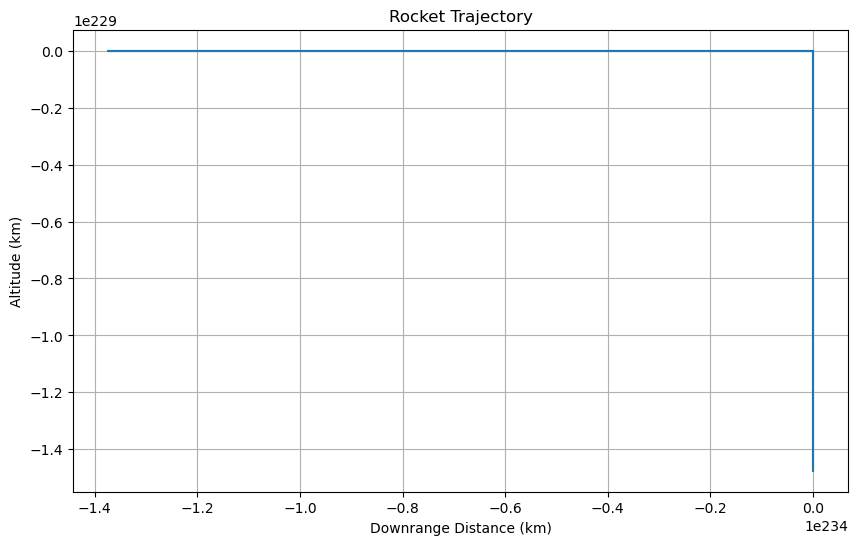

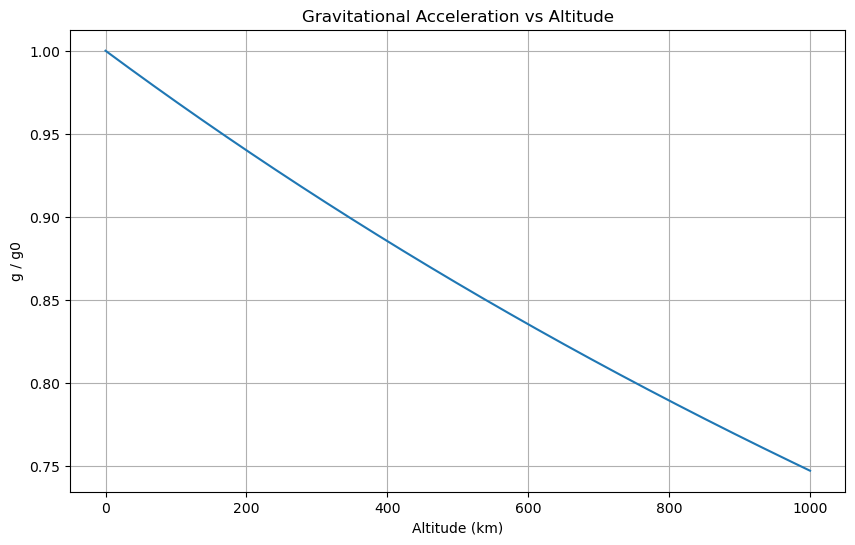

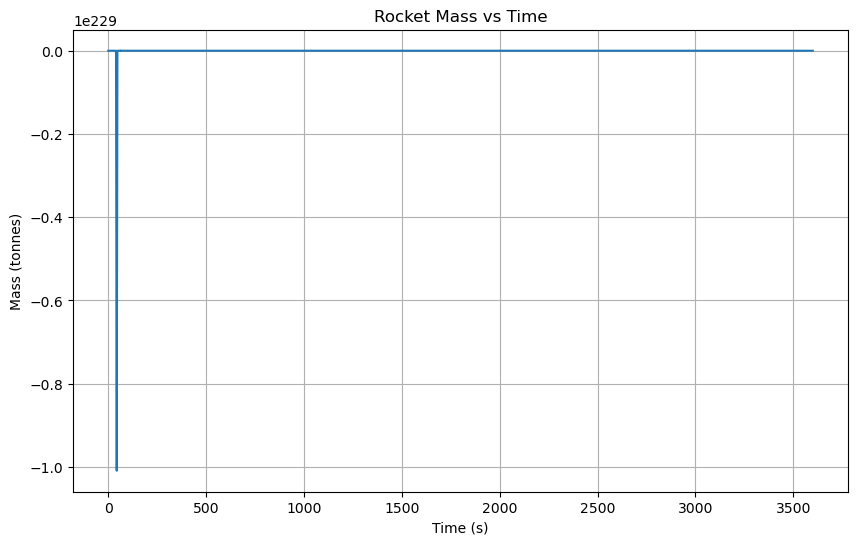

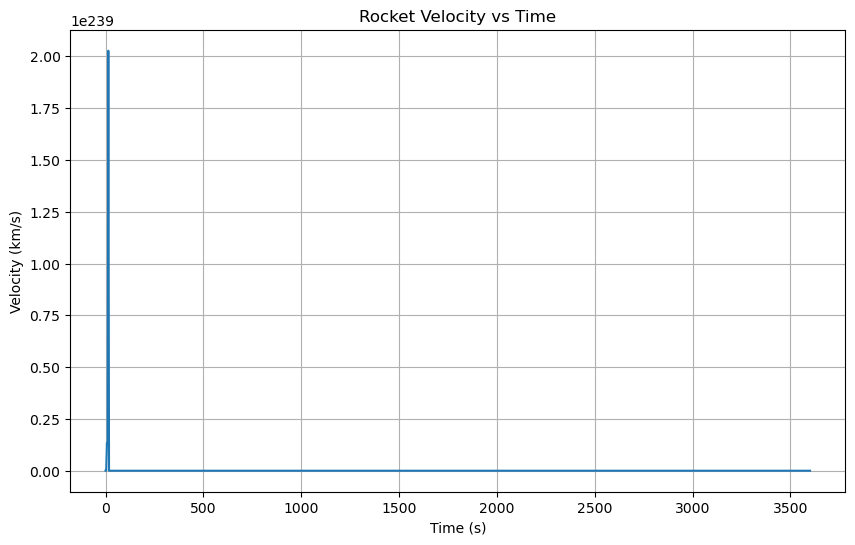

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Constants
M_E = 5.974e20
G = 6.6742e11
R_E = 6371e3  # radius of Earth (m)
Isp = 300  # specific impulse (s)
g0 = G*M_E/R_E**2 # 9.81  # gravitational acceleration at Earth's surface (m/s^2)
c = Isp * g0  # effective exhaust velocity (m/s)
A_e = 1.0  # exit area of the nozzle (m^2), assumed
p_a = 101325  # atmospheric pressure at sea level (Pa)
p_e = 0  # exhaust pressure, assumed vacuum for simplicity

# Initial conditions
v0 = 0  # initial velocity (m/s)
gamma0 = np.radians(90)  # initial flight path angle (radians), vertical launch
x0 = 0  # initial downrange distance (m)
h0 = 0  # initial altitude (m)
m_wet = 500e3  # initial wet mass (kg)
m_dry = 50e3  # dry mass (kg)
T = 7.5e6  # initial thrust (N)

# Time span
t = np.linspace(0, 3600, 1000)  # 3600 seconds, 1000 points

# Gravitational acceleration as a function of altitude
def gravity(h):
    return g0 * (R_E**2 / (R_E + h)**2)

# Differential equations
def rocket_dynamics(y, t, c, A_e, p_a, p_e, m_dry, T):
    v, gamma, x, h, m = y
    g = gravity(h)
    if m > m_dry:
        mdot_e = T / c  # mass flow rate (kg/s)
    else:
        mdot_e = 0  # no more propellant to burn
    T_dynamic = mdot_e * (c + (p_e - p_a) * A_e / mdot_e) if mdot_e != 0 else 0
    dvdt = (T_dynamic / m) - g * np.sin(gamma)
    if v == 0:
        print("v==0 at t=", t)
        dgamma_dt = 0
    else:
        print("v is", v)
        print("gamma is", gamma)
        dgamma_dt = -(1 / v) * (g - (v**2 / (R_E + h))) * np.cos(gamma)
    dxdt = (R_E / (R_E + h)) * v * np.cos(gamma)
    dhdt = v * np.sin(gamma)
    dmdt = -mdot_e  # rate of mass consumption
    return [dvdt, dgamma_dt, dxdt, dhdt, dmdt]

# Initial state
y0 = [v0, gamma0, x0, h0, m_wet]

# Integrate the equations over the time grid
solution = odeint(rocket_dynamics, y0, t, args=(c, A_e, p_a, p_e, m_dry, T))

# Extract the results
v, gamma, x, h, m = solution.T

# Plotting the trajectory
plt.figure(figsize=(10, 6))
plt.plot(x / 1e3, h / 1e3)  # convert to kilometers for readability
plt.title('Rocket Trajectory')
plt.xlabel('Downrange Distance (km)')
plt.ylabel('Altitude (km)')
plt.grid(True)
plt.show()

# Plotting g as a function of altitude
z = np.linspace(0, 1000e3, 1000)  # altitude from 0 to 1000 km
g_z = gravity(z)
plt.figure(figsize=(10, 6))
plt.plot(z / 1e3, g_z / g0)  # plot g/g0
plt.title('Gravitational Acceleration vs Altitude')
plt.xlabel('Altitude (km)')
plt.ylabel('g / g0')
plt.grid(True)
plt.show()

# Plotting mass vs time
plt.figure(figsize=(10, 6))
plt.plot(t, m / 1e3)  # convert mass to tonnes for readability
plt.title('Rocket Mass vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Mass (tonnes)')
plt.grid(True)
plt.show()

# Plotting velocity vs time
plt.figure(figsize=(10, 6))
plt.plot(t, v / 1e3)  # convert velocity to km/s for readability
plt.title('Rocket Velocity vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (km/s)')
plt.grid(True)
plt.show()
